In [1]:
from google.colab import files
uploaded = files.upload()

Saving DATASET_Preprocessed.csv to DATASET_Preprocessed.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['DATASET_Preprocessed.csv']))

In [4]:
data

,Unnamed: 0,tweet,label
0,0,a a woman you should not complain about cleani...,2
1,1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,2,dawg you ever fuck a bitch and she sta to cry ...,1
3,3,she look like a tranny,1
4,4,the shit you hear about me might be true or it...,1
...,...,...,...
50501,50501,get this worse than scum out of our country bu...,0
50502,50502,let this hoe touch this kid i swear to fucking...,0
50503,50503,that is what happens when illegal alien have a...,0
50504,50504,stopimmigration,0


In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
50501,get this worse than scum out of our country bu...,0
50502,let this hoe touch this kid i swear to fucking...,0
50503,that is what happens when illegal alien have a...,0
50504,stopimmigration,0


In [6]:
data.dropna(inplace=True)
data.shape

(50456, 2)

In [7]:
data.label.value_counts()

1    26531
2    13651
0     8160
3     2114
Name: label, dtype: int64

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

In [9]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [10]:
y=data['label']
x=data['tweet']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(37842,) (37842,)
(12614,) (12614,)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


In [13]:
X_train_tweet = embed(list(X_train))

X_test_tweet = embed(list(X_test))

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)

print(X_test_tweet.shape, y_test.shape)
print("="*100)

After Embedding vectorizations
(37842, 512) (37842,)
(12614, 512) (12614,)


In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [15]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [16]:
labels_=['hatefull','offensive','neither','Tobacco']

Start training...done!
Start testing...done!
accuracy: 0.7646266053591247
              precision    recall  f1-score   support

    hatefull       0.72      0.46      0.56      2040
   offensive       0.78      0.85      0.81      6633
     neither       0.72      0.76      0.74      3413
     Tobacco       0.95      0.92      0.94       528

    accuracy                           0.76     12614
   macro avg       0.79      0.75      0.76     12614
weighted avg       0.76      0.76      0.76     12614



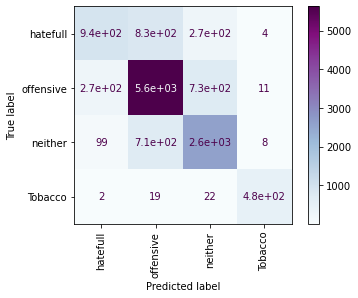

In [17]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.753210718249564
              precision    recall  f1-score   support

    hatefull       0.61      0.56      0.58      2040
   offensive       0.83      0.76      0.80      6633
     neither       0.69      0.82      0.75      3413
     Tobacco       0.86      0.97      0.91       528

    accuracy                           0.75     12614
   macro avg       0.75      0.78      0.76     12614
weighted avg       0.76      0.75      0.75     12614



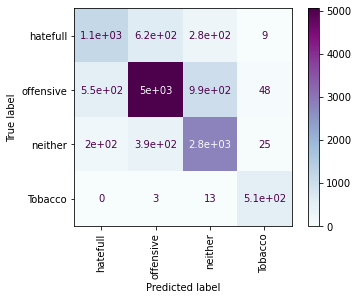

In [18]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [19]:
weights={0:0.259068,1:0.079680,2:0.154860,3:1}

MODELS WITH CLASS WEIGHTS

Start training...done!
Start testing...done!
accuracy: 0.723481845568416
              precision    recall  f1-score   support

    hatefull       0.50      0.66      0.57      2040
   offensive       0.87      0.67      0.75      6633
     neither       0.67      0.83      0.74      3413
     Tobacco       0.84      0.96      0.90       528

    accuracy                           0.72     12614
   macro avg       0.72      0.78      0.74     12614
weighted avg       0.75      0.72      0.73     12614



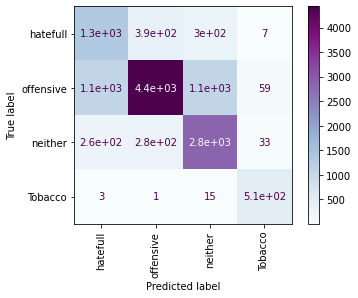

In [20]:
log_model=LogisticRegression(penalty='l2',max_iter=1000,class_weight=weights)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.7406849532265737
              precision    recall  f1-score   support

    hatefull       0.57      0.57      0.57      2040
   offensive       0.83      0.75      0.79      6633
     neither       0.69      0.80      0.74      3413
     Tobacco       0.75      0.97      0.85       528

    accuracy                           0.74     12614
   macro avg       0.71      0.77      0.74     12614
weighted avg       0.75      0.74      0.74     12614



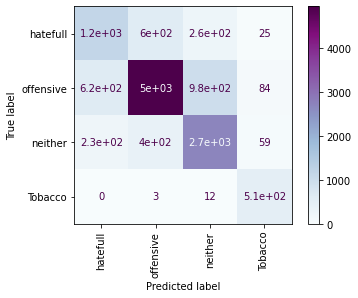

In [21]:
svm = LinearSVC(class_weight=weights, verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [22]:
from keras.layers import Input, Lambda, Dense,GRU,LSTM,Flatten
from keras.models import Model
import keras.backend as K

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50456 entries, 0 to 50505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   50456 non-null  object
 1   label   50456 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [24]:
x=data['tweet']
y=data['label']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

In [26]:
print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_test.shape,y_test.shape)

(32291,) (32291,)
(8073,) (8073,)
(10092,) (10092,)


MODELS WITH NEURAL NETWORKS

In [27]:
model = tf.keras.models.Sequential()

In [28]:
x = tf.keras.layers.Input(shape=[], dtype=tf.string)
y_ = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable=True)(x)
k = tf.keras.layers.Dense(256,activation='relu')(y_)
p = tf.keras.layers.Dropout(rate=0.25)(k)
z = tf.keras.layers.Dense(4, activation='softmax')(p)
model = tf.keras.models.Model(x, z)

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
%%time
model.fit(x_train, y_train, epochs=5, validation_data=(x_cv, y_cv))

Epoch 1/5
1010/1010 [==============================] - 227s 218ms/step - loss: 0.5792 - accuracy: 0.7674 - val_loss: 0.5283 - val_accuracy: 0.7934
Epoch 2/5
1010/1010 [==============================] - 220s 217ms/step - loss: 0.2167 - accuracy: 0.9216 - val_loss: 0.6463 - val_accuracy: 0.7909
Epoch 3/5
1010/1010 [==============================] - 219s 217ms/step - loss: 0.0536 - accuracy: 0.9825 - val_loss: 0.8429 - val_accuracy: 0.7814
Epoch 4/5
1010/1010 [==============================] - 219s 217ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 1.0705 - val_accuracy: 0.7680
Epoch 5/5
1010/1010 [==============================] - 219s 217ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 1.0594 - val_accuracy: 0.7585
CPU times: user 14min 1s, sys: 31.7 s, total: 14min 33s
Wall time: 18min 24s


In [31]:
predicts=model.predict(x_test)

In [32]:
y_predict=[np.argmax(x) for x in predicts ]
len(y_predict)

10092

In [33]:
y_test

38733    2
47872    0
39102    2
37112    1
39684    2
        ..
41958    2
47209    0
17340    1
22110    1
29055    0
Name: label, Length: 10092, dtype: int64

In [34]:
from sklearn import metrics

In [35]:
print(metrics.confusion_matrix(y_test,y_predict))

[[1002  470  155    5]
 [ 483 4329  483   12]
 [ 168  674 1879    9]
 [   4    3   11  405]]


In [36]:
from sklearn.metrics import classification_report

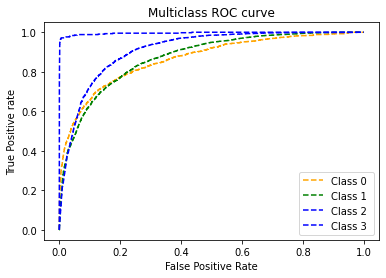

In [37]:
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicts[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 ')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [38]:
metrics_report = classification_report(y_test, y_predict, target_names=labels_)
print(metrics_report)

              precision    recall  f1-score   support

    hatefull       0.60      0.61      0.61      1632
   offensive       0.79      0.82      0.80      5307
     neither       0.74      0.69      0.71      2730
     Tobacco       0.94      0.96      0.95       423

    accuracy                           0.75     10092
   macro avg       0.77      0.77      0.77     10092
weighted avg       0.75      0.75      0.75     10092



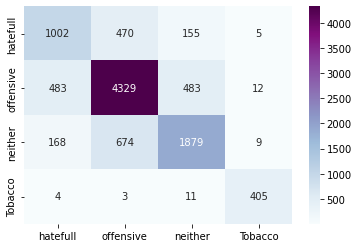

In [39]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu',xticklabels=labels_,yticklabels=labels_)

In [40]:
x1 = tf.keras.layers.Input(shape=[], dtype=tf.string)
y_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable=True)(x1)
k1 = tf.keras.layers.Dense(128,activation='relu')(y_1)
p1 = tf.keras.layers.Dropout(rate=0.50)(k1)
z1 = tf.keras.layers.Dense(4, activation='softmax')(p1)
model1 = tf.keras.models.Model(x1, z1)

In [41]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
%%time
model1.fit(x_train, y_train, epochs=3, validation_data=(x_cv, y_cv))

Epoch 1/3
1010/1010 [==============================] - 227s 219ms/step - loss: 0.6076 - accuracy: 0.7576 - val_loss: 0.5044 - val_accuracy: 0.7981
Epoch 2/3
1010/1010 [==============================] - 220s 218ms/step - loss: 0.2411 - accuracy: 0.9151 - val_loss: 0.5771 - val_accuracy: 0.7882
Epoch 3/3
1010/1010 [==============================] - 220s 218ms/step - loss: 0.0614 - accuracy: 0.9802 - val_loss: 0.9354 - val_accuracy: 0.7742
CPU times: user 8min 29s, sys: 18.9 s, total: 8min 48s
Wall time: 11min 28s


In [43]:
predicts1=model1.predict(x_test)

In [44]:
predicts1[0]

array([5.0980023e-05, 2.4676863e-03, 9.9747628e-01, 4.9998530e-06],
      dtype=float32)

In [45]:
y_predict1=[np.argmax(x) for x in predicts1 ]
len(y_predict1)

10092

In [46]:
metrics_report1 = classification_report(y_test, y_predict1, target_names=labels_)
print(metrics_report1)

              precision    recall  f1-score   support

    hatefull       0.71      0.51      0.59      1632
   offensive       0.83      0.81      0.82      5307
     neither       0.69      0.85      0.76      2730
     Tobacco       0.97      0.93      0.95       423

    accuracy                           0.77     10092
   macro avg       0.80      0.77      0.78     10092
weighted avg       0.78      0.77      0.77     10092



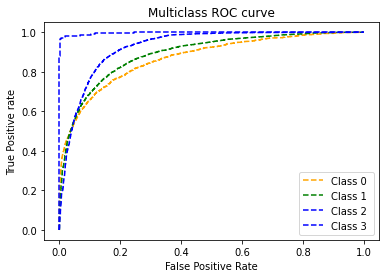

In [47]:
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicts1[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 ')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 ')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 ')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

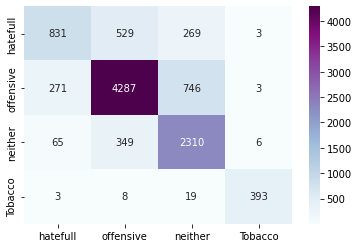

In [48]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predict1)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu',xticklabels=labels_,yticklabels=labels_)